In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
files = glob.glob('../results/gapanalysis/*.txt')

In [3]:
data = {}
for f in files:
    r = np.loadtxt(f)
    name = f[-6:-4]
    data[name] = r
    print(name,r)

PW [194. 192. 178. 140. 132. 121.  98.  78.  72.  68.  58.  57.  55.  54.
  54.  54.  54.  53.  51.  50.  49.  45.  44.  43.  43.  42.  41.  41.
  40.  39.  37.  37.  36.  36.  36.  36.  35.  34.  33.  33.  31.  29.
  29.  28.  28.  28.  27.  27.  27.  27.  26.  26.  26.  25.  25.  24.
  24.  24.  24.  23.  23.  23.  22.  22.  22.  22.  22.  21.  21.  21.
  21.  21.  20.  19.  19.  19.  19.  19.  18.  18.  18.  18.  18.  17.
  17.  17.  17.  17.  16.  16.  16.  16.  16.  16.  16.  16.  15.  15.
  15.  15.  15.  14.  14.  14.  14.  14.  14.  14.  14.  14.  13.  13.
  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  12.  12.  12.
  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  11.  11.  11.
  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   

In [10]:
#df = pd.DataFrame([_ for _ in itertools.zip_longest(*data)], columns=data.values())
x = list(itertools.zip_longest(*data.values()))
df = pd.DataFrame(x)
df.columns = list(data.keys())
df = df/4

In [11]:
df.head()

,PW,GM,ER,BA,WS
0,48.5,128.00,110.25,52.75,96.25
1,48.0,22.00,31.25,45.75,38.25
2,44.5,22.00,30.25,39.00,37.75
3,35.0,22.00,30.25,35.00,33.25
4,33.0,21.75,25.75,31.75,32.50


In [26]:
# # transform dataset : 
# rows = []
# for gtype,r_list in data.items():
#     for r in r_list:
#         rows.append([gtype,r])
        
# df2 = pd.DataFrame(rows,columns = ('type','radius'))
# df2.radius = df2.radius/4
# df2.head()
#df1 = pd.read_csv("/home/lau/Desktop/Thesis Stuff/gap_data5/adjusted.csv",index_col = 0)
df1 = pd.read_csv("/home/lau/Desktop/Thesis Stuff/gap_data6/radii/adjusted3.csv",index_col = 0)
df1.Radius = df1.Radius/4
#df2 = df2[df2.iter == 0]
df1

,Radius,iter,type
0,24.25,0,WS
1,21.75,0,WS
2,20.25,0,WS
3,19.25,0,WS
4,19.00,0,WS
...,...,...,...
22987,1.25,4,PW
22988,1.25,4,PW
22989,1.25,4,PW
22990,1.25,4,PW


(0, 20)

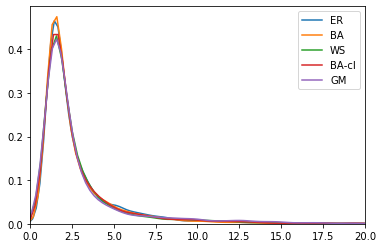

In [27]:
cmap = plt.get_cmap('viridis')
colors = [cmap(x) for x in np.linspace(0,1,5)]

#for i in range(5):
#df2 = df1[df1.iter == 0]
df2 = df1
sns.kdeplot(df2[df2.type == 'ER'].Radius, label="ER")
sns.kdeplot(df2[df2.type == 'BA'].Radius, label="BA")
sns.kdeplot(df2[df2.type == 'WS'].Radius, label="WS")
sns.kdeplot(df2[df2.type == 'PW'].Radius, label="BA-cl")
sns.kdeplot(df2[df2.type == 'GM'].Radius, label="GM")
plt.xlim(0,20)

In [49]:
# add real data : 
#radii_full <- read_delim("data2.txt", delim=' ', col_names = c("radius", "surface", "stack", "pipeline", "dataset"))
obsrvd = pd.read_csv()

TypeError: parser_f() missing 1 required positional argument: 'filepath_or_buffer'

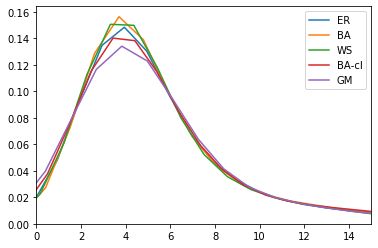

In [50]:
sns.kdeplot(df2[df2.type == 'ER'].Radius, label="ER")
sns.kdeplot(df2[df2.type == 'BA'].Radius, label="BA")
sns.kdeplot(df2[df2.type == 'WS'].Radius, label="WS")
sns.kdeplot(df2[df2.type == 'PW'].Radius, label="BA-cl")
sns.kdeplot(df2[df2.type == 'GM'].Radius, label="GM")
plt.xlim(0,15)
plt.legend();

No handles with labels found to put in legend.


(0, 15)

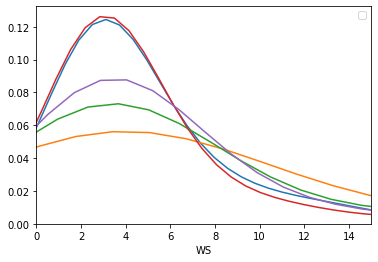

In [15]:
for c in df.columns:
    sns.distplot(df[c].dropna(),hist = False)
plt.legend()
plt.xlim(0,15)

In [28]:
df1 = pd.read_csv("/home/lau/Desktop/Thesis Stuff/gap_data6/radii/adjusted3.csv",index_col = 0)
df1.Radius = df1.Radius/4

# new df :
rows = []

for t in df1.type.unique():
    # find all occurences of specific radii : 
    sub_df = df1[df1.type == t]
    radii = sub_df.Radius.unique()
    for r in radii:
        occrncs = sub_df[sub_df.Radius == r].to_numpy()
        freq = len(occrncs)
        tot_surfc = freq * (np.pi * r**2) * .25
        rows.append([r,tot_surfc,t])

In [29]:
nw_df= pd.DataFrame(rows, columns = ['radius','surface','dataset'])
nw_df.to_csv("/home/lau/Desktop/Thesis Stuff/gap_data5/sim_nets2.txt",header = None,index = False)
#np.savetxt("/home/lau/Desktop/Thesis Stuff/gap_data5/sim_nets.txt", nw_df.values)

In [17]:
data = pd.read_csv('/home/lau/Desktop/Thesis Stuff/gap_data5/adjusted.csv',index_col = 0)

In [18]:
print(data.head())
# convert to microns
data.Radius = data.Radius/4.

   Radius  iter type
0      97     0   WS
1      70     0   WS
2      62     0   WS
3      61     0   WS
4      61     0   WS


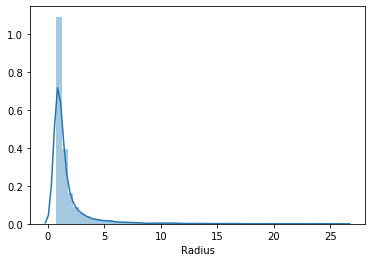

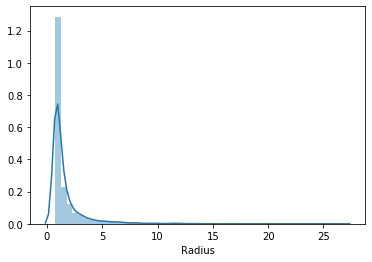

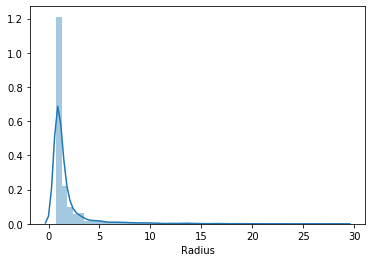

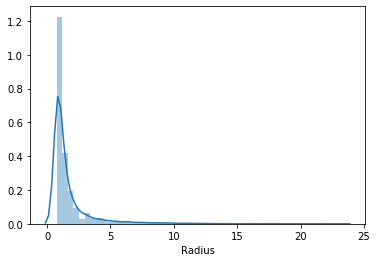

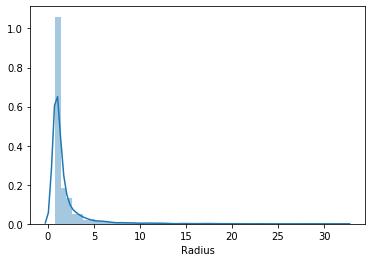

In [20]:
for gtype in data.type.unique():
    sns.distplot(data[data.type == gtype].Radius,norm_hist = True)
    plt.show()